In [4]:
import pandas as pd
import seaborn as sns

Load the dataset from the given dataset.csv file.

In [3]:
data = pd.read_csv('dataset.csv', index_col=[0])
data.head()

,feature_1,feature_2,feature_3,feature_4
0,0.286672,0.006711,0.178739,-4.997212
1,0.230586,0.013423,0.351505,-4.297285
2,0.074979,0.020134,0.879812,-3.884994
3,0.187541,0.026846,0.226149,-3.590439
4,0.422490,0.033557,0.424136,-3.360375


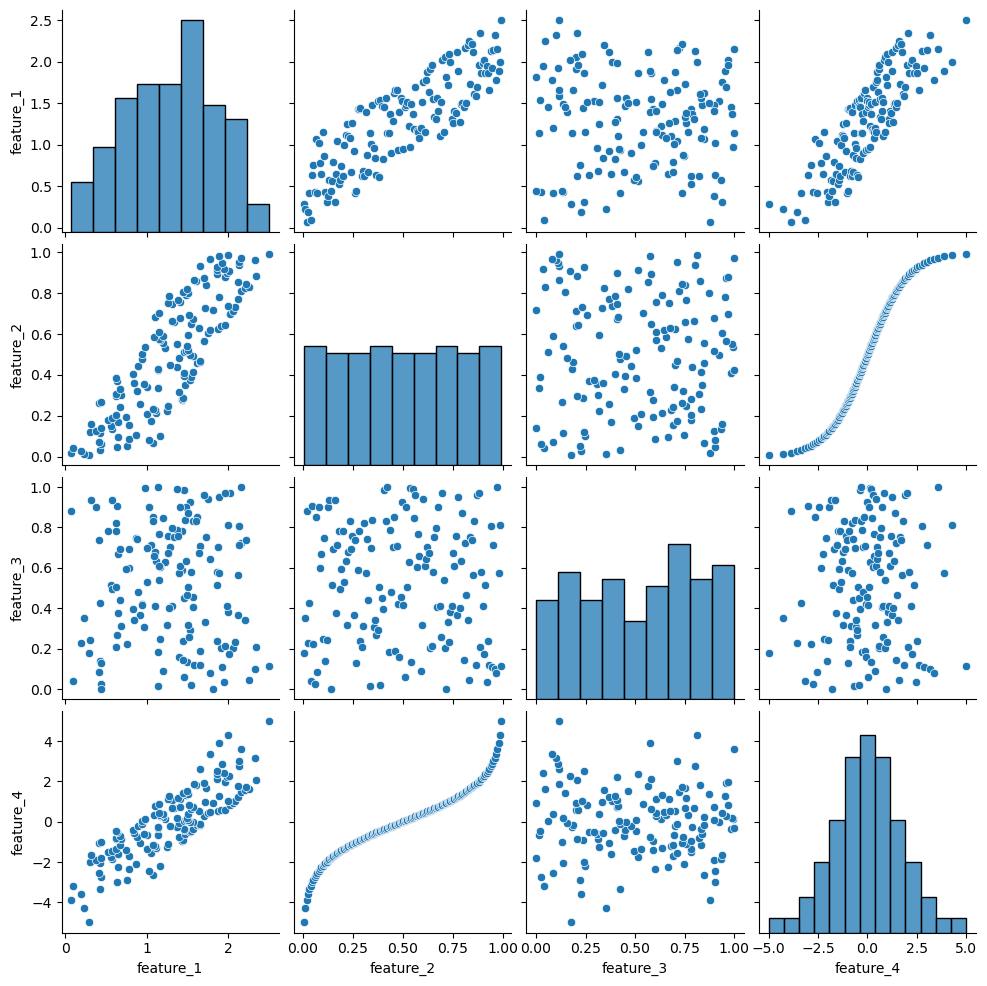

In [5]:
# Check for correlations using Scatter Plot matrix
sns.pairplot(data)

#### Which correlation would suit the comparison of feature_1 and feature_3?

__Answer:__ There is no correlation between feature_1 and feature_2

In [29]:
# Pearson Correlation Coefficient between feature_1 & feature_3
data['feature_1'].corr(data['feature_3'],method='pearson')

-0.004628298271604041

In [30]:
# Kendall Correlation Coefficient between feature_1 & feature_3
data['feature_1'].corr(data['feature_3'],method='kendall')

-0.006251149108291966

In [31]:
# Spearman Correlation Coefficient between feature_1 & feature_3
data['feature_1'].corr(data['feature_3'],method='spearman')

-0.017550354079596653

#### Plot the correlation heat map of the entire dataset. (2 points)

<Axes: >

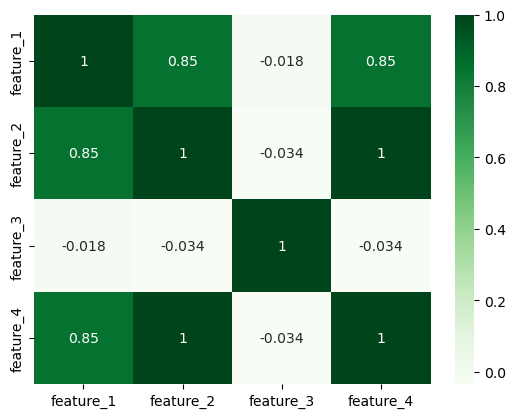

In [23]:
sns.heatmap(data.corr(method= 'spearman'), annot=True, cmap='Greens')

#### Load the processedClevelandData.csv dataset. The features for the dataset are described in the featureDescription.csv file. Perform data cleaning procedures such that your final dataset is usable in the following questions.

In [37]:
df = pd.read_csv('processedClevelandData.csv', sep=';', index_col= None)
df.head()

,id,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
0,1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0
1,2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,2.0,3.0,3.0,1
2,3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.0,2.0,7.0,1
3,4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.0,0.0,3.0,0
4,5,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.0,0.0,3.0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   Age       303 non-null    float64
 2   Sex       303 non-null    float64
 3   cp        303 non-null    float64
 4   trestbps  303 non-null    float64
 5   chol      303 non-null    float64
 6   fbs       303 non-null    float64
 7   resetecg  303 non-null    float64
 8   thalach   303 non-null    float64
 9   exang     303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 33.3+ KB


In [39]:
# convert object to numeric
df.ca = pd.to_numeric(df.ca, errors='coerce')
df.thal = pd.to_numeric(df.thal, errors='coerce')

#### Use Spearman's and Kendall correlation to quantify the correlation between age and Resting blood pressure.

In [47]:
# Spearman Corr
df[['Age','trestbps', 'chol', 'thalach']].corr(method='spearman')[1:]['Age']

trestbps    0.292183
chol        0.191253
thalach    -0.391633
Name: Age, dtype: float64

In [45]:
# Kendall Corr
df[['Age','trestbps', 'chol', 'thalach']].corr(method='kendall')[1:]['Age']

trestbps    0.205814
chol        0.132025
thalach    -0.275696
Name: Age, dtype: float64

#### which variable(s) are most correlated with age? Illustrate with heatmaps.

<Axes: >

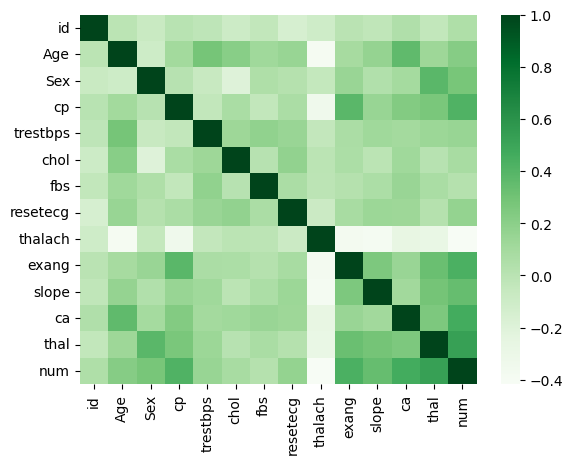

In [52]:
# plot the heatmap of Correlation coefficient for numerical columns only
sns.heatmap(df.select_dtypes('number').corr(), cmap='Greens')

__Answer:__ Age has correlation with
* thalach (Maximum heart rate achieved): negative correlation
* ca (number of major vessels (0-3)): Positive Correlation

    the rest variables doesn't have significant correlation with 'Age'.

#### Plot the frequency of “Sex” variable in the dataset and describe what you observe in the plot. Similarly plot and describe the 'ca' feature for the male participants.

[[<matplotlib.axis.XTick at 0x2888dfc2650>,

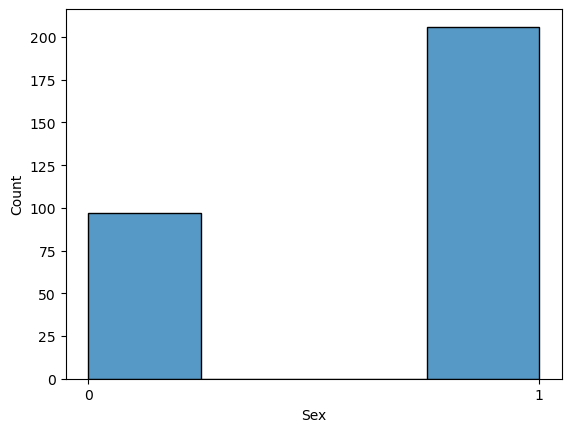

In [88]:
sns.histplot(data=df, x="Sex", bins=4).set(xticks=[0.0, 1.0])

1 = Male & 0 = Female

Number of males is twice the number of females in the dataset.

#### Similarly plot and describe the number of major vessels, Resting Blood Pressure, electrocardiographic results, Serum Cholesterol Level feature for the male participants.

<Axes: xlabel='ca', ylabel='Count'>

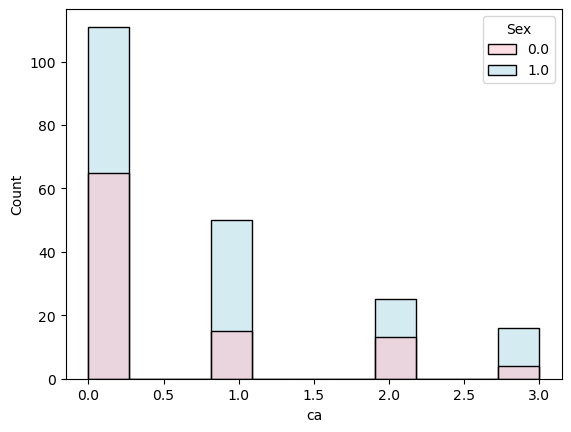

In [107]:
sns.histplot(df, x="ca", hue="Sex", palette=['pink', 'lightblue'])

<Axes: xlabel='trestbps', ylabel='Count'>

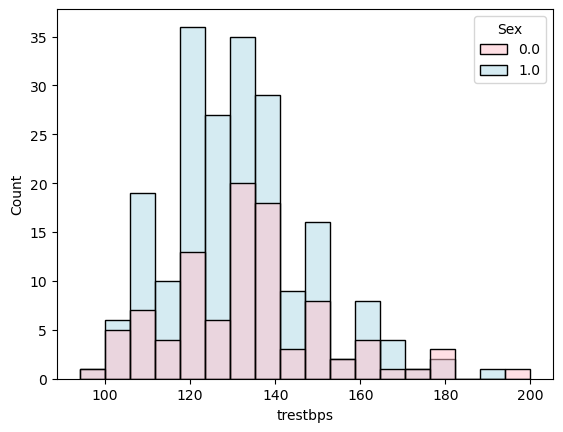

In [95]:
# Resting Blood Pressure
sns.histplot(df, x="trestbps", hue="Sex", palette=['pink', 'lightblue'])

<Axes: xlabel='resetecg', ylabel='Count'>

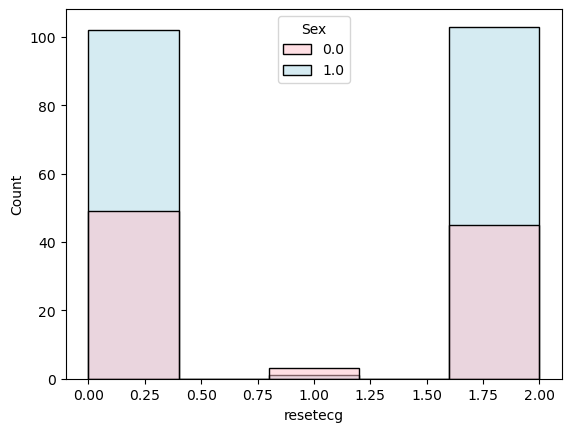

In [98]:
# electrocardiographic results
sns.histplot(df, x="resetecg", hue="Sex", palette=['pink', 'lightblue'], bins=5)

<Axes: xlabel='chol', ylabel='Count'>

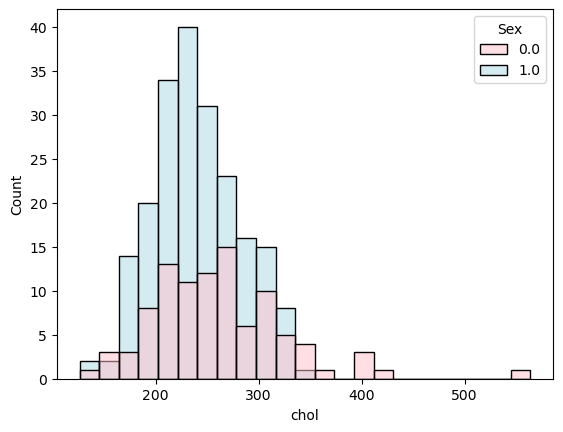

In [109]:
# Serum Cholesterol Level
sns.histplot(df, x="chol", hue="Sex", palette=['pink', 'lightblue'])

Note: Number of data points of Males is larger than number of females.

Detect outlier patients for features "trestbps" and "chol". Illustrate with plots.

In [147]:
def detect_outliers(dataframe, column_index):
    """
    Detect outliers in a DataFrame column using the interquartile range (IQR) method.

    Parameters:
        dataframe (pandas.DataFrame): The DataFrame containing the data.
        column_index (str): The name of the column in the DataFrame to detect outliers for.

    Returns:
        pandas.DataFrame: A DataFrame containing rows with outlier values in the specified column.

    The function identifies outliers in the specified column using the interquartile range (IQR) method.
    It calculates the first quartile (Q1) and the third quartile (Q3), then computes the interquartile range (IQR).
    Outliers are defined as values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].
    A box plot is also generated to visualize the distribution of the data.
    """
    q1 = dataframe[column_index].quantile(0.25)
    q3 = dataframe[column_index].quantile(0.75)

    iqr = q3 - q1

    upper_threshold = q3 + 1.5 * iqr
    lower_threshold = q1 - 1.5 * iqr
    
    print(f'Outliers at column {column_index}.\nUpper thershold = {upper_threshold} and Lower threshold = {lower_threshold}')
    
    sns.boxplot(dataframe, x=column_index, color='lightgreen')

    return dataframe[(dataframe[column_index] > upper_threshold) | (dataframe[column_index] < lower_threshold)]

Outliers at column trestbps.
Upper thershold = 170.0 and Lower threshold = 90.0


,id,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
14,15,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,1.0,0.0,7.0,0
83,84,68.0,1.0,3.0,180.0,274.0,1.0,2.0,150.0,1.0,2.0,0.0,7.0,1
126,127,56.0,0.0,4.0,200.0,288.0,1.0,2.0,133.0,1.0,3.0,2.0,7.0,1
172,173,59.0,0.0,4.0,174.0,249.0,0.0,0.0,143.0,1.0,2.0,0.0,3.0,1
183,184,59.0,1.0,1.0,178.0,270.0,0.0,2.0,145.0,0.0,3.0,0.0,7.0,0
188,189,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,1.0,1.0,7.0,1
201,202,64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,1.0,0.0,3.0,0
213,214,66.0,0.0,4.0,178.0,228.0,1.0,0.0,165.0,1.0,2.0,2.0,7.0,1
231,232,55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,2.0,0.0,3.0,1


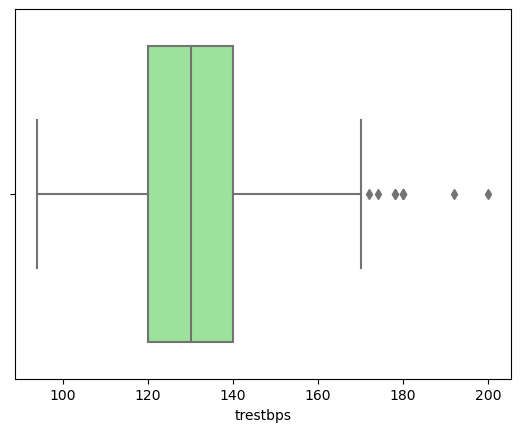

In [150]:
# resting blood pressure (in mm Hg)
detect_outliers(df, "trestbps")

Outliers at column chol.
Upper thershold = 371.0 and Lower threshold = 115.0


,id,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
48,49,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,1.0,1.0,3.0,0
121,122,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,2.0,3.0,7.0,1
152,153,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,2.0,0.0,7.0,0
173,174,62.0,0.0,4.0,140.0,394.0,0.0,2.0,157.0,0.0,2.0,0.0,3.0,0
181,182,56.0,0.0,4.0,134.0,409.0,0.0,2.0,150.0,1.0,2.0,2.0,7.0,1


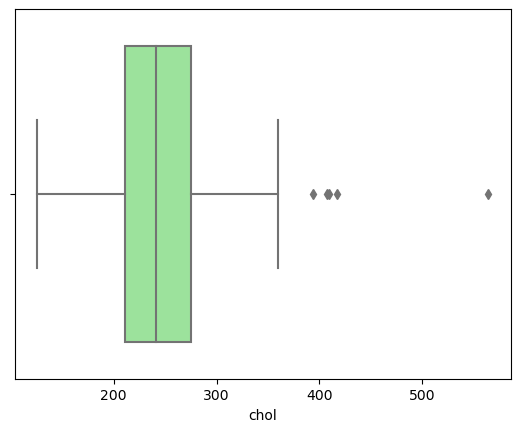

In [151]:
# serum cholestoral in mg/dl
detect_outliers(df, "chol")